In [1]:
import random

def generate_data(num_entries, num_rows, filename):
    # Open the file for writing
    with open(filename, 'w') as file:
        # Generate each row
        for i in range(num_rows):
            # Generate each entry in the row as a list of 3 random integers
            row = [f"[{random.randint(1, 10)*i}, {random.randint(5, 8)*i}, {random.randint(11, 18)*i}]" for _ in range(num_entries)]
            # Join all entries into a single string with commas and write to file
            formatted_row = ', '.join(row)
            file.write(f"\"{formatted_row}\"\n")

# Example usage:
generate_data(20, 500, 'fake_data.csv')

In [1]:
import random

def generate_data(num_entries, num_rows, filename):
    # Open the file for writing
    with open(filename, 'w') as file:
        # Generate each row
        for i in range(num_rows):
            # Generate each entry in the row as a list of 3 integers following a simple pattern
            row = [
                f"[{random.randint(1, 10) *i}, {random.randint(5, 8) *3*i}, {random.randint(11, 18) + 2.1*i}]"
                for _ in range(num_entries)
            ]
            # Join all entries into a single string with commas and write to file
            formatted_row = ', '.join(row)
            file.write(f"\"{formatted_row}\"\n")

# Example usage:
generate_data(1000, 500, 'fake_data.csv')

In [2]:
import random

def generate_data(num_entries, num_rows, filename):
    # Open the file for writing
    with open(filename, 'w') as file:
        # Generate each row
        for i in range(num_rows):
            # Generate each entry in the row as a list of 3 integers following a simple pattern
            row = [
                f"[{random.randint(1, 10) + 2*i}, {random.randint(5, 8) + i}, {random.randint(11, 18) - i}]"
                for _ in range(num_entries)
            ]
            # Join all entries into a single string with commas and write to file
            formatted_row = ', '.join(row)
            file.write(f"\"{formatted_row}\"\n")

# Example usage:
generate_data(1000, 1000, 'fake_data.csv')

In [3]:
import numpy as np
import pandas as pd
import ast

# Load and parse the CSV data
def load_and_parse_data(file_path):
    data = pd.read_csv(file_path, header=None)
    sequences = []
    for index, row in data.iterrows():
        # Convert the row from string representation to list of lists of integers
        sequence = ast.literal_eval(row[0])
        sequences.append(sequence)
    return np.array(sequences)

# Split sequences into input and target
def split_sequences(sequences):
    inputs = []
    targets = []
    for seq in sequences:
        mid = len(seq) // 2
        inputs.append(seq[:mid])
        targets.append(seq[mid:])
    return np.array(inputs), np.array(targets)

# Load and preprocess the data
file_path = 'fake_data.csv'  # replace with your file path
sequences = load_and_parse_data(file_path)
inputs, targets = split_sequences(sequences)

print(inputs)
print(targets)



[[[    4     8    14]
  [    1     6    14]
  [    7     7    18]
  ...
  [    4     8    16]
  [    7     5    11]
  [    3     8    11]]

 [[    9     7    14]
  [   11     6    10]
  [    4     7    15]
  ...
  [   11     7    13]
  [   11     9    17]
  [   12     8    17]]

 [[   10     8    11]
  [    9     7    12]
  [   11     9     9]
  ...
  [    7    10    16]
  [    7     9    16]
  [   13     7     9]]

 ...

 [[ 3996  2003 -1980]
  [ 4004  2004 -1979]
  [ 4000  2004 -1980]
  ...
  [ 3996  2003 -1985]
  [ 4001  2004 -1984]
  [ 4002  2002 -1981]]

 [[ 4001  2003 -1986]
  [ 3998  2003 -1981]
  [ 4003  2006 -1987]
  ...
  [ 4004  2004 -1980]
  [ 4006  2006 -1980]
  [ 4002  2006 -1987]]

 [[ 4007  2005 -1986]
  [ 3999  2006 -1982]
  [ 4008  2005 -1987]
  ...
  [ 4000  2006 -1987]
  [ 3999  2004 -1982]
  [ 4007  2006 -1981]]]
[[[    7     8    15]
  [    9     5    18]
  [    7     5    18]
  ...
  [    5     5    14]
  [    7     7    13]
  [    1     6    18]]

 [[    5     6

In [4]:
from sklearn.model_selection import train_test_split

# Splitting the Data
input_train, input_test, target_train, target_test = train_test_split(inputs, targets, test_size=0.2, random_state=42)

In [5]:
from keras.models import Sequential
from keras.layers import LSTM, RepeatVector, TimeDistributed, Dense

# Defining constants we are going to use
n_input = 500  # Adjusted from 1250 to match the actual sequence length
n_output = 500  # Assuming output sequence length is the same as input
n_features = 3

# Define the model
model = Sequential()

# Encoder part
model.add(LSTM(150, activation='relu', input_shape=(n_input, n_features)))

# RepeatVector is used as a bridge between the encoder and decoder parts
model.add(RepeatVector(n_output))

# Decoder part
model.add(LSTM(150, activation='relu', return_sequences=True))

# Densely connected output layer
model.add(TimeDistributed(Dense(n_features)))

# Compiling the model
model.compile(optimizer='adam', loss='mse')

In [6]:
model.fit(input_train, target_train, epochs=10, verbose=0)

In [ ]:
loss = model.evaluate(input_test, target_test, verbose=0)
print('Model loss:', loss)

Model loss: 868.6080322265625


1/1 [==============================] - 0s 279ms/step


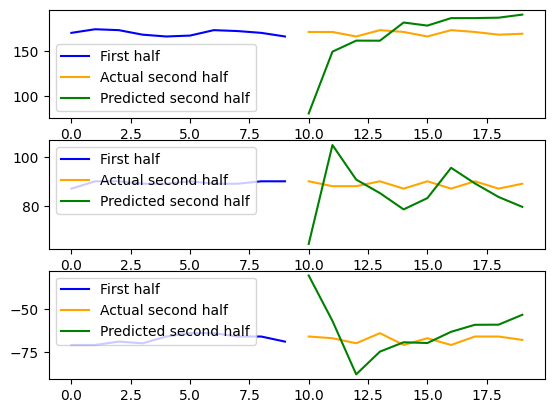

In [ ]:
import matplotlib.pyplot as plt
import random

# pick a random index from the test dataset
idx = random.randint(0, len(input_test) - 1)

# get the corresponding sequences
input_seq = input_test[idx]
target_seq = target_test[idx]

# reshape the input sequence and make a prediction
predicted_seq = model.predict(input_seq.reshape(1, -1, 3))[0]

# create three subplots, one for each variable
fig, axs = plt.subplots(3)

# use different colors for the first half, actual second half and predicted second half
colors = ['blue', 'orange', 'green']

for i in range(3):
    # plot the first half of the sequence
    axs[i].plot(range(0, n_input), input_seq[:, i], color=colors[0], label='First half')
    # plot the second half of the sequence
    axs[i].plot(range(n_input, 2*n_input), target_seq[:, i], color=colors[1], label='Actual second half')
    # plot the model's prediction for the second half of the sequence
    axs[i].plot(range(n_input, 2*n_input), predicted_seq[:, i], color=colors[2], label='Predicted second half')
    axs[i].legend()

plt.show()

1/1 [==============================] - 0s 27ms/step


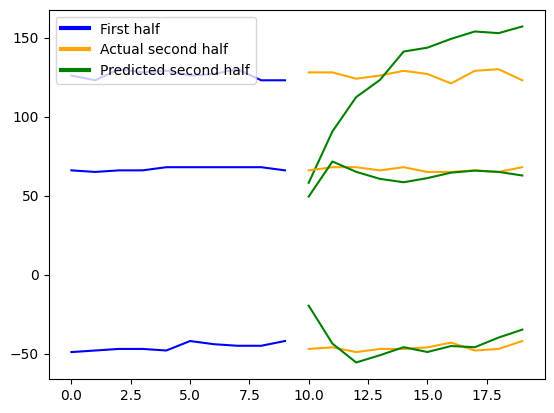

In [ ]:
from matplotlib.lines import Line2D

# Assuming input_test and target_test are correctly shaped as (num_samples, n_input, n_features)
# Pick a random index from the test dataset
idx = random.randint(0, len(input_test) - 1)

# Get the corresponding sequences
input_seq = input_test[idx]
target_seq = target_test[idx]

# Reshape the input sequence for prediction if necessary
if input_seq.ndim < 3:
    input_seq = input_seq.reshape(1, n_input, n_features)

# Make a prediction
predicted_seq = model.predict(input_seq)[0]

# Create a plot
fig, ax = plt.subplots()

# Use different colors for the first half, actual second half, and predicted second half
colors = ['blue', 'orange', 'green']

# Plot the first half of the sequence, the second half of the sequence, and the prediction
for i in range(n_features):
    ax.plot(range(0, n_input), input_seq[0, :, i], color=colors[0])
    ax.plot(range(n_input, 2*n_input), target_seq[:, i], color=colors[1])
    ax.plot(range(n_input, 2*n_input), predicted_seq[:, i], color=colors[2])

# Set up legend
lines = [Line2D([0], [0], color=c, linewidth=3) for c in colors]
labels = ['First half', 'Actual second half', 'Predicted second half']
ax.legend(lines, labels)

plt.show()